## Logical Gate
In this notebook we are going to use tensorflow to train our first neural network.

We're going to learn the OR-gate as before and also the AND-gate.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


This can be magic for you. We tell Python to go fetch tensorflow and refer to it as "tf", and some other things.

For the OR-gate, our training data consists of the truth table of OR. We also give names "on" and "off" and the biases.

In [2]:
ON, OFF = 1.0, 0.0
bias = 1.0

training_inputs = [
    [ON, ON],
    [ON, OFF],
    [OFF, ON],
    [OFF, OFF],
]

training_outputs = [
    [OFF],
    [ON],
    [ON],
    [OFF],
]

Next we are going to initialize the weights as random numbers.

In [3]:
w1 = tf.Variable(tf.random_normal([2, 2]))
b1 = tf.Variable(tf.zeros([2]))

w2 = tf.Variable(tf.random_normal([2, 1]))
b2 = tf.Variable(tf.zeros([1]))

output1 = tf.tanh(tf.add(tf.matmul(training_inputs, w1), b1))
output2 = tf.tanh(tf.add(tf.matmul(output1, w2), b2))

The output of our model is just the sigmoid function of the sum and products of the weights, inputs, and biases.

The error is then the difference between the actual outputs and the correct outputs.

In [4]:
error = tf.subtract(training_outputs, output2)
mse = tf.reduce_mean(tf.square(error))

From the gradient we compute the change in the weights that we want to perform in order to improve loss.

In [5]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(mse)

Now we start a tensorflow session and let the model train for 50 epochs. We're also going to log error and accuracy.

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

err, target = 1, 0.01
epoch, max_epoch = 0, 50000

last_weights = []
train_loss_results = []

while err > target and epoch < max_epoch:
    epoch += 1
    err, w_ = sess.run([mse, train])
    last_weights = w_
    train_loss_results.append(err)

print("epoch:", epoch, "mse:", err)


epoch: 6347 mse: 0.00999819


A quick look at the falling loss.

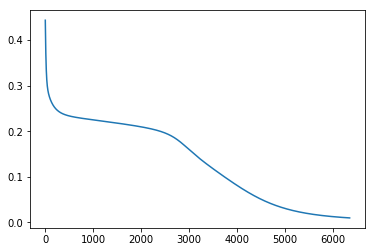

In [12]:
plt.plot(train_loss_results)

And to check we look at the predicted outcomes:

In [14]:
print(last_weights)

None


And now you for the AND-gate!